In [12]:
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt

# INFORMACIÓN DE DIGITAL

In [65]:
# csv file path
dfd = "Resources/FRTPUSRBDIGITAL.csv"

# Import csv file as a DataFrame
df_digital = pd.read_csv(dfd,low_memory=False)

# Filtrar por sucursal
#df_digital = dfd.drop(dfd[dfd['FCSUCURSAL'] != '2784'].index)

df_digital.head()

,FCUSERNAME,FDINICIO_SESION,FCSUCURSAL,FCMAC,FIUSUARIO_ID
0,BazEktWFauto,2021-03-16 08:34:20-06,2784.0,D4:C9:4B:1D:98:C4,3405.0
1,BazEktWFauto,2021-03-16 08:54:46-06,2784.0,B4:1C:30:65:DF:F6,3406.0
2,BazEktWFauto,2021-03-16 12:44:49-06,2784.0,36:D2:F4:FE:96:25,3410.0
3,BazEktWFauto,2021-03-16 12:50:34-06,2784.0,36:D2:F4:FE:96:25,3411.0
4,BazEktWFauto,2021-03-16 13:15:17-06,2784.0,36:D2:F4:FE:96:25,3413.0


In [44]:
# csv file path
df = "Resources/FRTPUSRBDIGITAL.csv"

# Import csv file as a DataFrame
df = pd.read_csv(df,low_memory=False)
#Filtrar solo por muertes de coronavirus
dfcovid = df.drop(df[df['FCSUCURSAL'] != 2784].index)
dfcovid.head()

,FCUSERNAME,FDINICIO_SESION,FCSUCURSAL,FCMAC,FIUSUARIO_ID,FDFECHA_MOD,FCUSUARIO_MOD


In [ ]:
sesion_df =df_digital.groupby(["FCMAC"]).size().reset_index(name='NUM')
sesion_df

# INFORMACIÓN DE PORTAL

In [13]:
# csv file path
dfp = "Resources/PORTAL.csv"

# Import csv file as a DataFrame
df_portal = pd.read_csv(dfp,encoding='latin-1')

df_portal.head()

/Users/berenicecedillo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,FISUSUARIO_ID,FCIP,FCMAC,FCUSERNAME,FCNOMBRE,FCAPELLIDO_PATERNO,FCAPELLIDO_MATERNO,FCNOMBRE_COMPLETO,FDINICIO_SESION,FCCORREO,FCENVIAR,FCSUCURSAL,RANGO_EDAD,GENERO,FCURLFOTO,FCTIPO_SESION,FCFASE_SESION
0,1,192.168.60.33,B4:BF:F6:C6:B4:91,BazEktWF,NaN,NaN,NaN,NaN,14/12/20 00:24,NaN,NaN,2024,NaN,NaN,NaN,1,NaN
1,2,192.168.60.173,20:DA:22:07:F1:7B,BazEktWF,NaN,NaN,NaN,NaN,14/12/20 00:36,NaN,NaN,2066,NaN,NaN,NaN,1,NaN
2,3,192.168.60.254,B6:87:03:70:55:2C,BazEktWF,NaN,NaN,NaN,NaN,14/12/20 00:45,NaN,NaN,2066,NaN,NaN,NaN,1,NaN
3,4,192.168.60.172,40:4E:36:39:A1:70,BazEktWF,NaN,NaN,NaN,NaN,14/12/20 01:05,NaN,NaN,100,NaN,NaN,NaN,1,NaN
4,5,192.168.60.181,AC:AF:B9:41:96:10,BazEktWF,NaN,NaN,NaN,NaN,14/12/20 02:44,NaN,NaN,3612,NaN,NaN,NaN,1,NaN


In [14]:
sesion2_df =df_portal.groupby(["FCMAC"]).size().reset_index(name='NUM')
sesion2_df

,FCMAC,NUM
0,00:00:02:87:61:47,1
1,00:00:06:91:FA:12,1
2,00:00:91:0D:0B:1C,1
3,00:00:B0:6B:29:57,2
4,00:01:00:03:03:44,1
...,...,...
36775,FE:E6:61:2A:F5:97,1
36776,FE:F6:49:FC:C1:6F,4
36777,FE:F8:4A:56:BE:45,2
36778,FE:FB:3B:D5:43:8F,1


# Género

In [15]:
gender_df =df_portal.groupby(["GENERO"]).size().reset_index(name='NUM')
gender_df

,GENERO,NUM
0,femenino,2995
1,masculino,3453


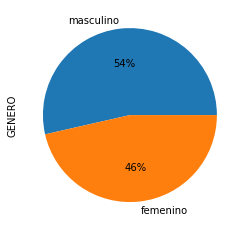

In [16]:
# pie
genero = df_portal["GENERO"].value_counts().plot(kind='pie', autopct='%1.0f%%')

#Save image
plt.savefig("Resources/IMG/generoPie.png")

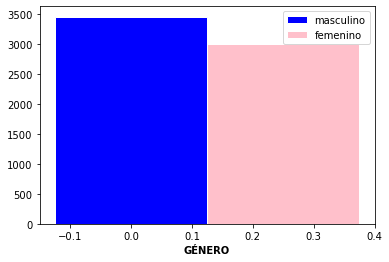

In [17]:
# bar chart
#arrays
dataGender = df_portal["GENERO"].to_list()

# set width of bar
barWidth = 0.25
 
# set height of bar
males = gender_df[gender_df.GENERO == 'masculino']
bars1 = males['NUM'].to_list()

females = gender_df[gender_df.GENERO == 'femenino']
bars2 = females['NUM'].to_list()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='masculino')
plt.bar(r2, bars2, color='pink', width=barWidth, edgecolor='white', label='femenino')
 
# Add xticks on the middle of the group bars


plt.xlabel('GÉNERO', fontweight='bold')
#plt.xticks([r + barWidth for r in range(len(bars1))], dataGender)

#Save image
plt.savefig("Resources/IMG/generoBar.png")
 
# Create legend & Show graphic
plt.legend()
plt.show()

# Rango edad

In [68]:
edad_df =df_portal.groupby(["FCRANGO_EDAD"]).size().reset_index(name='NUM')
edad_df

,FCRANGO_EDAD,NUM
0,16 a 20,3
1,21 a 25,2
2,51 a 55,1
3,Menos de 10,1


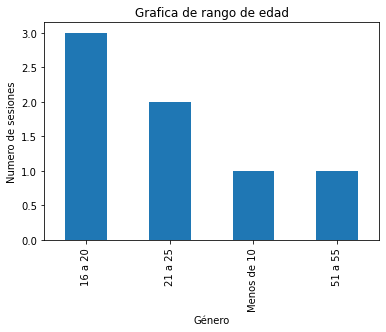

In [69]:
a = df_portal["FCRANGO_EDAD"].value_counts()
%matplotlib inline
a.plot(kind='bar')
#a.plot(kind='bar',color =['blue', 'green'] )

plt.xlabel("Género")
plt.ylabel("Numero de sesiones")
plt.title("Grafica de rango de edad")

#Save image
#plt.savefig("Resources/IMG/rangoEdad.png")
plt.show()

In [51]:
sesionP_df =df_portal.groupby(["FCMAC"]).size().reset_index(name='NUM')
#sesion = sesionP_df.drop(df[df['NUM'] != 1].index)

sesionP_df

,FCMAC,NUM
0,02:BF:F9:C8:61:44,1
1,08:AA:55:BE:9E:AD,1
2,08:CC:27:F6:DF:EA,3
3,0C:8F:FF:5E:E5:FB,1
4,0E:4E:39:E2:2D:FA,1
...,...,...
63,E6:F8:FF:68:C1:56,1
64,E8:7F:95:DC:A1:52,1
65,EC:3C:BB:C2:10:6B,1
66,F0:D7:AA:85:CD:C4,1


# INFORMACIÓN DE WIFI

In [76]:
# csv file path
dfw = "Resources/FRTPUSRWIFI.csv"

# Import csv file as a DataFrame
df_wifi = pd.read_csv(dfw,low_memory=False)
df_wifi.head()

,FICLIENTE_ID,FIDEVICE_ID,FCMAC,FCIP,FCHOSTNAME,FCUSERNAME,FCOS,FCCONNECTED,FIUSAGE,FIVLAN,...,FDFIN_SESION,FCUSER_PROFILE,FICLIENTEHEALTH,FIAPPHEALTH,FINETWORK,FIRADIO_HEALTH,FCTIPO_CONEXION,FCSTATUS_CONEXION,FDFECHA_MOD,FCUSUARIO_MOD
0,111016361062427,111016314972618,44D791C81F40,192.168.60.98,HUAWEI_P30_lite-329574325,NaN,Android,False,3548,60,...,06/03/21 03:24:23.000000000,VLAN_60,40,100,100,40,WIRELESS,DISCONNECTED,11/03/21,FRANQUICIA
1,111016373284428,111016315414569,5ED48506DCE0,192.168.60.193,NaN,NaN,Android,False,0,60,...,06/03/21 02:23:55.000000000,VLAN_60,0,0,0,100,WIRELESS,DISCONNECTED,11/03/21,FRANQUICIA
2,111016373284180,111016315414569,6244AC5972BB,192.168.60.184,Galaxy-A30s,NaN,Android,False,0,60,...,06/03/21 02:15:31.000000000,VLAN_60,100,100,100,100,WIRELESS,DISCONNECTED,11/03/21,FRANQUICIA
3,111016356745625,111016315418555,8CF11225EDE8,192.168.60.24,NaN,NaN,Android,False,0,60,...,06/03/21 02:31:37.000000000,VLAN_60,0,0,0,40,WIRELESS,DISCONNECTED,11/03/21,FRANQUICIA
4,111016346695033,111016315445669,149F3CF51489,0.0.0.0,android-9830c8d32e6d783b,NaN,Android,False,0,60,...,06/03/21 02:21:55.000000000,VLAN_60,100,100,100,100,WIRELESS,DISCONNECTED,11/03/21,FRANQUICIA


In [77]:
sesion3_df =df_wifi.groupby(["FCMAC"]).size().reset_index(name='NUM')
sesion3_df

,FCMAC,NUM
0,00000289F05A,1
1,0000B06B2957,1
2,0001019D5A5D,1
3,00030832379F,2
4,000308347150,1
...,...,...
19993,FEF2FF329705,1
19994,FEF73EF0E5C0,1
19995,FEFC7E6E2FAC,1
19996,FEFED2269E30,2


# Sistema operativo

In [78]:
so_df =df_wifi.groupby(["FCOS"]).size().reset_index(name='NUM')
so_df

,FCOS,NUM
0,Android,20033
1,Android OS,1301
2,Apple iOS,1150
3,Axis communications ab IPCamera,11
4,CrOS,44
5,Embedded OS,2
6,Linux,8
7,Slingbox,1
8,Tizen OS,56
9,Verizon Wireless Ellipsis 8,8


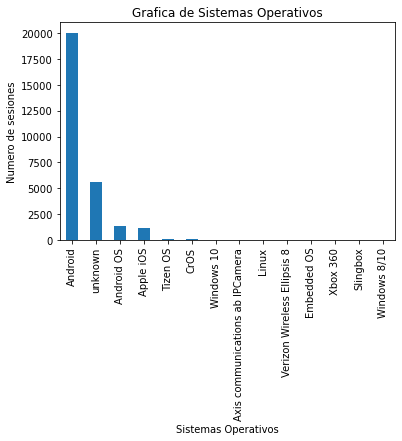

In [79]:
a = df_wifi["FCOS"].value_counts()
%matplotlib inline
a.plot(kind='bar')

plt.xlabel("Sistemas Operativos")
plt.ylabel("Numero de sesiones")
plt.title("Grafica de Sistemas Operativos")

#Save image
#new_img = img.resize((256,256))
#new_img.save('1-256x256.png','png')


plt.savefig("Resources/IMG/sistemaOp.png")
plt.show()

<ipython-input-56-6e5ee64941d5>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlabel('')
<ipython-input-56-6e5ee64941d5>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0, 0.5, '')

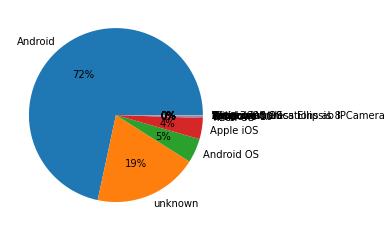

In [56]:
#SO
so_df = df_wifi["FCOS"].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.axes().set_xlabel('')
plt.axes().set_ylabel('')

#Save image
#plt.savefig("Resources/IMG/Diabetes.png")

# MERGE

In [57]:
 # Merge two dataframes using an outer join
merge_df = pd.merge(df_digital, df_portal, on="FCMAC", how="outer")
merge_df

KeyboardInterrupt: 

In [ ]:
merge2_df = pd.merge(df_wifi, df_portal, on="FCMAC", how="outer")
merge2_df

In [ ]:
sistemaop_df =merge2_df.groupby(["FCOS"]).size().reset_index(name='NUM')
sistemaop_df

In [ ]:
edadrank_df =merge2_df.groupby(["FCRANGO_EDAD"]).size().reset_index(name='NUM')
edadrank_df

In [ ]:
merge3_df = pd.merge(merge_df, merge2_df, on="FCMAC", how="outer")
merge3_df

In [ ]:
sesion4_df =merge3_df.groupby(["FCMAC"]).size().reset_index(name='NUM')
sesion4_df

# Tipificación de loggeos 

In [73]:
# csv file path
dfusr = "Resources/Usuarios.csv"

# Import csv file as a DataFrame
df_usuarios = pd.read_csv(dfusr,low_memory=False)
df_usuarios.head()

,IDTIPO,TIPO,CONTEO
0,1,Formulario,6
1,3,APP,4


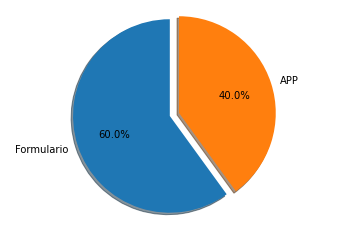

In [74]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Formulario', 'APP'
sizes = [6, 4]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("Resources/IMG/tipSesion.png")
plt.show()

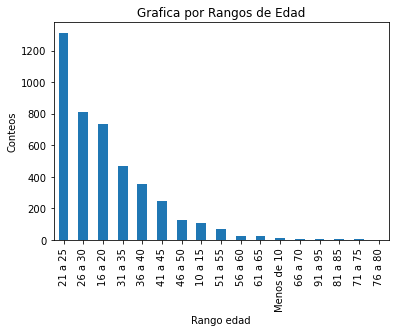

In [75]:
a = merge2_df["FCRANGO_EDAD"].value_counts()
%matplotlib inline
a.plot(kind='bar')

plt.xlabel("Rango edad")
plt.ylabel("Conteos")
plt.title("Grafica por Rangos de Edad")

#Save image
#plt.savefig("Resources/IMG/gender.png")
plt.show()

In [ ]:
from datetime import datetime, timedelta

fecha_cad2 = '06/03/2021  3:24:23'
#df_wifi["FDFIN_SESION"]
fecha_cad1 = '06/03/2021  2:13:40'
#df_wifi["FDINICIO_SESION"]
fecha1 = datetime.strptime(fecha_cad1, '%d/%m/%Y %H:%M:%S')
fecha2 = datetime.strptime(fecha_cad2, '%d/%m/%Y %H:%M:%S')

res = fecha2 - fecha1
print(res)

# ZONIFICACIÓN

In [ ]:
# csv file path
dfz = "Resources/zonifica.csv"

# Import csv file as a DataFrame
df_zonas = pd.read_csv(dfz,encoding='latin-1')

df_zonas.head()

# Usuarios con mayo presencia por zona

In [ ]:
zona_df= df_zonas.groupby(["FCZONA", 'FCMAC'])[['FCZONA', 'FCMAC']].count() 
zona_df =df_zonas.groupby([ "FCZONA", 'FCMAC']).size().reset_index(name='NUM')
zona_df = zona_df.loc[zona_df["NUM"] > 6, :]

zona_df

# Zona con mayor presencia

In [ ]:
zona_df =df_zonas.groupby(["Zona"]).size().reset_index(name='NUM')
zona_df